<div style='width:20em'><img src='img/logo-igm.png'></div>
<div style='font-size:larger'><strong>Algorithmique et programmation 2</strong><br>
L1 Mathématiques - L1 Informatique<br>
Semestre 2
</div>

# Coloration de zone

### Problème

Dans une image, étant donné un pixel $(i, j)$, modifier la couleur de tous les pixels de la région à laquelle appartient $(i, j)$

- **Pixel :** carré coloré constituant une image
- **Couleur :** représentée par un entier
- **Image :** liste de listes de couleurs (= matrice d'entiers)
- **Région :** ensemble de pixels *voisins* les uns des autres et de même couleur

### Voisinage

Chaque pixel $(i, j)$ de l'image possède (au plus) quatre voisins

<img src="img/voisins.png" width=30%></img>

De coordonnées $(i-1, j)$, $(i, j-1)$, $(i+1, j)$ et $(i, j+1)$

### Régions

<img src="img/exemples_grilles.png" width=60%></img>

- On doit pouvoir passer de voisin en voisin de chaque pixel
d'une région à chaque autre (zone **connexe**)
- Limitée par les bords de l'image et les pixels de couleur
différente

### Algorithme

Pour colorer en `c_nouv` la zone à laquelle appartient le pixel (couple d'entiers) `px` :

1. Mémoriser l'ancienne couleur `c_prec` de `px`
1. Si `c_prec == c_nouv`, ne rien faire
1. Changer la couleur de `px` de `c_prec` en
  `c_nouv`
1. Pour chaque voisin `v` de `px` de couleur
  `c_prec`, **colorer récursivement** la région de `v` en
  `c_nouv`


**Remarque :** Cas d'arrêt implicite si aucun voisin de couleur `c_prec`

**Exercice :** modéliser et résoudre le problème en Python

### Implémentation en Python

On suppose qu'une `image` est représentée par une liste de listes d'entiers (liste de lignes contenant elles-mêmes la liste des couleurs des pixels)

In [1]:
def dans_image(image, i, j):
    """Renvoie True si le pixel (i, j)
    est un pixel de l'image, False sinon.
    """
    return (0 <= i < len(image) 
            and 0 <= j < len(image[i]))

In [2]:
def voisins(i, j):
    """Renvoie la liste des voisins du pixel (i, j)
    (sans prendre en compte les bords).
    """
    return [(i+1, j),
            (i, j+1), 
            (i-1, j), 
            (i, j-1)]

voisins(3, 4)

[(4, 4), (3, 5), (2, 4), (3, 3)]

In [3]:
def colorie(image, i, j, c_nouv):
    """Colore la région du pixel (i, j)
    dans la couleur c_nouv. Suppose
    que (i, j) est bien un pixel de
    l'image.
    """
    c_prec = image[i][j]  # étape 1
    if c_prec == c_nouv:  # étape 2
        return
    image[i][j] = c_nouv  # étape 3
    for vi, vj in voisins(i, j):  # étape 4
        if (dans_image(image, vi, vj) 
            and image[vi][vj] == c_prec):
                colorie(image, vi, vj, c_nouv)

[[0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2],
 [2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]]

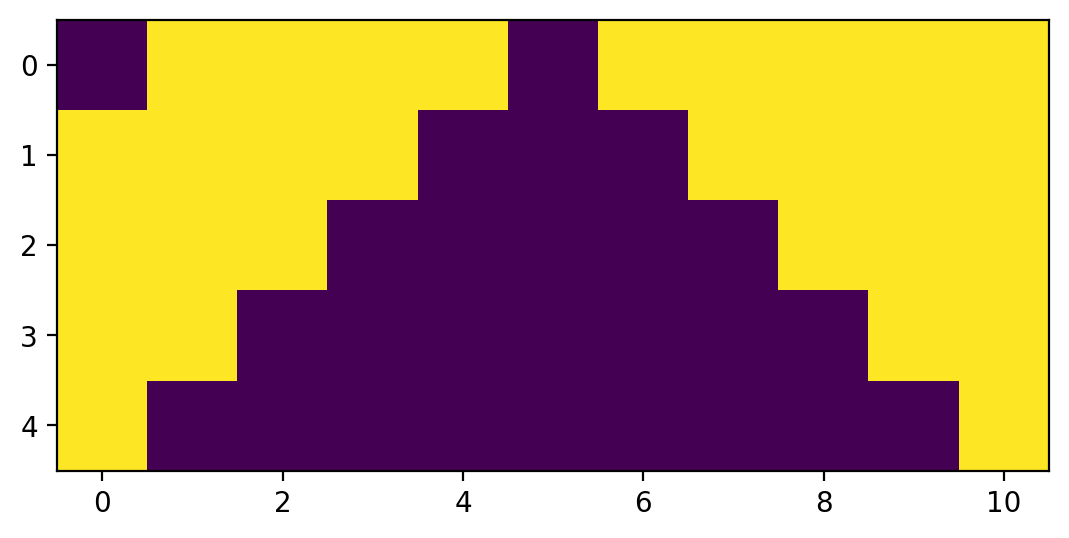

In [4]:
from matplotlib.pyplot import imshow
image = [[2] * (5-i) + [0] * (2*i+1) + [2] * (5-i) for i in range(5)]
image[0][0] = 0
imshow(image)
image

[[0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1],
 [2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

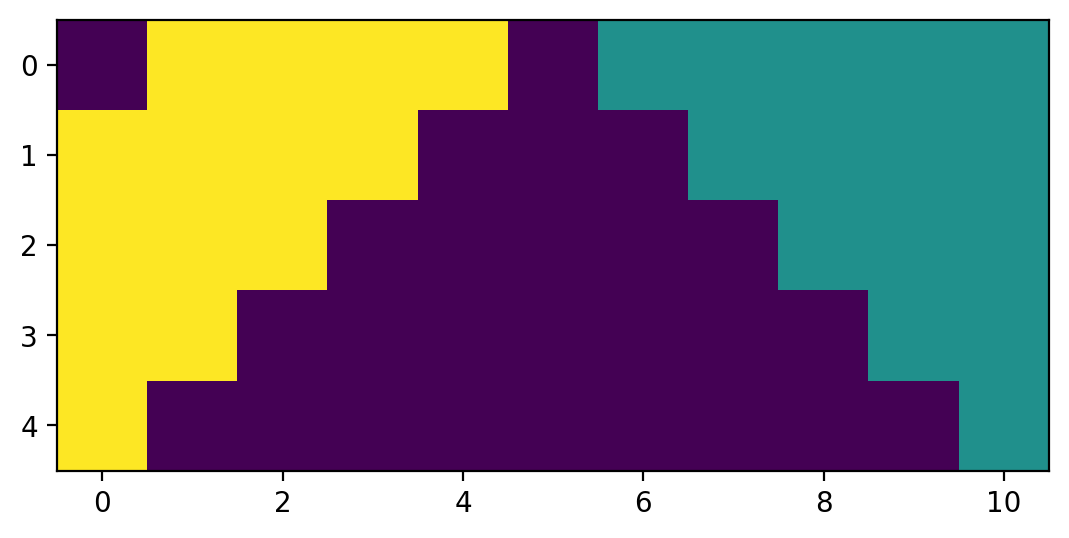

In [5]:
colorie(image, 0, 6, 1)
imshow(image)
image

***Démo :*** *programme `colorgrid.py`*

# Tours de Hanoi
  
<img src='img/Tower_of_Hanoi.jpeg' alt='Tours de Hanoï en bois'>

*(image : Wikipedia)*

**Situation initiale :**

- Trois emplacements A, B et C, marqués par des aiguilles verticales
- Disques de diamètres décroissants posés sur l'emplacement A
- Emplacements B et C libres

**Objectif :** déplacer tous les disques de A vers C, 

- En ne déplaçant qu'un disque à la fois
- En ne posant jamais un disque sur un disque plus petit

***Démo :*** *programme `hanoi.py`*

## Les Brahmes tombent (É. Lucas)

>    N. Claus de Siam a vu, dans ses voyages
>    pour la publication des écrits de l'illustre Fer-Fer-Tam-Tam, dans
>    le grand temple de Bénarès, au-dessous du dôme qui marque le
>    centre du monde, trois aiguilles de diamant, plantées dans une
>    dalle d'airain, hautes d'une coudée et grosses comme le corps
>    d'une abeille. Sur une de ces aiguilles, Dieu enfila au
>    commencement des siècles, 64 disques d'or pur, le plus large
>    reposant sur l'airain, et les autres, de plus en plus étroits,
>    superposés jusqu'au sommet. C'est la tour sacrée du Brahmâ. Nuit
>    et jour, les prêtres se succèdent sur les marches de l'autel,
>    occupés à transporter la tour de la première aiguille sur la
>    troisième, sans s'écarter des règles fixes que nous venons
>    d'indiquer, et qui ont été imposées par Brahma. Quand tout sera
>    fini, la tour et les brahmes tomberont, et ce sera la fin des
>    mondes !

*Édouard Lucas, Récréations mathématiques (tome 3), 1892*

## Algorithme

**Déplacer $n$ disques de A à C en passant par B**

- S'il n'y a aucun disque ($n = 0$) : aucun déplacement
- Sinon, déplacer les $n-1$ premiers disques de A vers B en passant par C
- Puis déplacer le plus grand disque de A vers C
- Enfin, déplacer les $n-1$ premiers disques de B vers C en passant par A

**Exercice :** modéliser et résoudre le problème en Python

## Arbre des appels

<img src="img/appels_hanoi.png" width=80%></img>

## Combien de déplacements ?

- Soit $H(n)$ le nombre de déplacements pour $n$ disques
- On a $H(0) = 0$ et $H(n) = 2 H(n-1) + 1$ *(suite arithmético-géométrique)*
- Premiers termes : $H(0) = 0, H(1) = 1, H(2) = 3, H(3) = 7, H(4) = 15...$
- Conjecture : $H(n) = 2^n - 1$

Preuve : posons $G(n) = H(n) + 1$. 

On a  $G(0) = 1$ et $G(n) - 1 = 2(G(n-1) - 1) + 1$,  
soit $G(n) = 2 G(n-1)$.

Ce qui donne $G(n) = 2^n$ (suite géométrique de premier terme 1 et de raison 2).

Et donc $H(n) = G(n) - 1 = 2^n - 1$.
    

On ne peut pas faire mieux (solution optimale) :
- soit $F(n)$ le nombre optimal de déplacements pour amener $n$ disques d'une tour à une autre
- on a bien $F(0) = H(0) = 0$
- pour déplacer $n$ disques, il faut à un moment déplacer le plus grand
- pour faire cela, les $n-1$ autres disques doivent tous être déplacés vers le troisième emplacement puis vers la destination, soit au moins $F(n) = 2 F(n-1) + 1 = H(n)$ déplacements

<img src="img/hanoi-graph.png" width=50%></img>

**Codage des positions :** $XYZ$ avec $X \in \{A, B, C\}$ la position du grand disque, $Y$ celle du moyen et $Z$ celle du petit

## La fin de l'Univers ??

- 64 disques : au moins $2^{64}-1$ déplacements (nombre à 20 chiffres !)
- 1 seconde par déplacement : 86 400 déplacements par jour
- Nombre d'années pour déplacer $n$ disques :

In [6]:
for i in [25, 29, 64]:
    print(i, "disques :", 
          round((2**i - 1) / (365.25*24*60*60), 2), 
          "années")

25 disques : 1.06 années
29 disques : 17.01 années
64 disques : 584542046090.63 années


- Durée totale pour 64 disques : 213 000 milliards de jours,  
 soit 584,5 milliards d'années,  
 soit 43 fois l'âge estimé de l'univers

## Implémentation en Python

**Codage des positions :**

- tours numérotées de 0 (à gauche) à 2 (à droite)
- disques numérotés de 0 (le plus petit) à $n-1$ (le plus grand)
- position du disque $i$ inscrite à l'indice $i$ dans une liste à valeurs dans $\{0, 1, 2\}$

**Exemples :**

- position initiale `[0, 0, 0]`
- position finale `[2, 2, 2]`
- plus petit disque à gauche, les autres au milieu : `[0, 1, 1]`

In [7]:
def hanoi(tours, n, source=0, dest=2, etape=1):
    if n == 0:
        return
    
    # on déplace les n-1 plus petits vers l'étape
    hanoi(tours, n-1, source, etape, dest)
    
    # on déplace le plus grand disque
    assert(tours[n-1] == source)
    tours[n-1] = dest
    print(f"{tours} (disque {n-1} de {source} vers {dest})")
    
    # on déplace les n-1 plus petits vers la destination
    hanoi(tours, n-1, etape, dest, source)

In [8]:
n = 3
tours = [0] * n   # tous les disques sur la tour 0
print(tours)
hanoi(tours, n)
print(tours)

[0, 0, 0]
[2, 0, 0] (disque 0 de 0 vers 2)
[2, 1, 0] (disque 1 de 0 vers 1)
[1, 1, 0] (disque 0 de 2 vers 1)
[1, 1, 2] (disque 2 de 0 vers 2)
[0, 1, 2] (disque 0 de 1 vers 0)
[0, 2, 2] (disque 1 de 1 vers 2)
[2, 2, 2] (disque 0 de 0 vers 2)
[2, 2, 2]


In [9]:
from callstats import *
from IPython.display import Image
hanoi = CallRecorder(hanoi)

In [10]:
n = 3
tours = [0] * n
g = hanoi(tours, n).graph()

[2, 0, 0] (disque 0 de 0 vers 2)
[2, 1, 0] (disque 1 de 0 vers 1)
[1, 1, 0] (disque 0 de 2 vers 1)
[1, 1, 2] (disque 2 de 0 vers 2)
[0, 1, 2] (disque 0 de 1 vers 0)
[0, 2, 2] (disque 1 de 1 vers 2)
[2, 2, 2] (disque 0 de 0 vers 2)


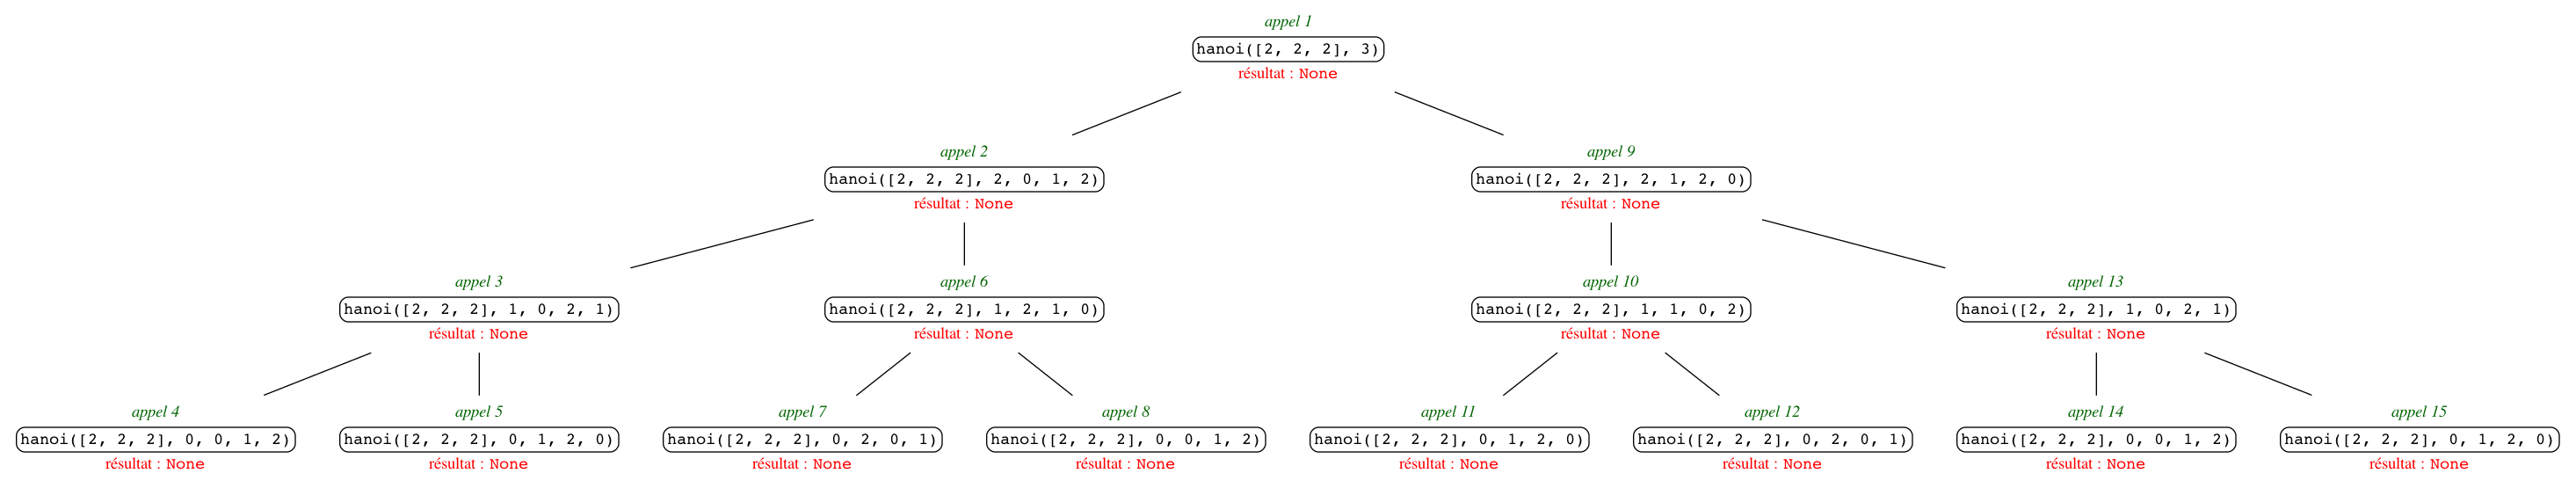

In [11]:
Image(g.pipe('png'))

In [12]:
tours = [0] * 10
g = hanoi(tours, 10).graph(verbose_labels=False)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] (disque 0 de 0 vers 1)
[1, 2, 0, 0, 0, 0, 0, 0, 0, 0] (disque 1 de 0 vers 2)
[2, 2, 0, 0, 0, 0, 0, 0, 0, 0] (disque 0 de 1 vers 2)
[2, 2, 1, 0, 0, 0, 0, 0, 0, 0] (disque 2 de 0 vers 1)
[0, 2, 1, 0, 0, 0, 0, 0, 0, 0] (disque 0 de 2 vers 0)
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0] (disque 1 de 2 vers 1)
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0] (disque 0 de 0 vers 1)
[1, 1, 1, 2, 0, 0, 0, 0, 0, 0] (disque 3 de 0 vers 2)
[2, 1, 1, 2, 0, 0, 0, 0, 0, 0] (disque 0 de 1 vers 2)
[2, 0, 1, 2, 0, 0, 0, 0, 0, 0] (disque 1 de 1 vers 0)
[0, 0, 1, 2, 0, 0, 0, 0, 0, 0] (disque 0 de 2 vers 0)
[0, 0, 2, 2, 0, 0, 0, 0, 0, 0] (disque 2 de 1 vers 2)
[1, 0, 2, 2, 0, 0, 0, 0, 0, 0] (disque 0 de 0 vers 1)
[1, 2, 2, 2, 0, 0, 0, 0, 0, 0] (disque 1 de 0 vers 2)
[2, 2, 2, 2, 0, 0, 0, 0, 0, 0] (disque 0 de 1 vers 2)
[2, 2, 2, 2, 1, 0, 0, 0, 0, 0] (disque 4 de 0 vers 1)
[0, 2, 2, 2, 1, 0, 0, 0, 0, 0] (disque 0 de 2 vers 0)
[0, 1, 2, 2, 1, 0, 0, 0, 0, 0] (disque 1 de 2 vers 1)
[1, 1, 2, 2, 1, 0, 0, 0, 0, 

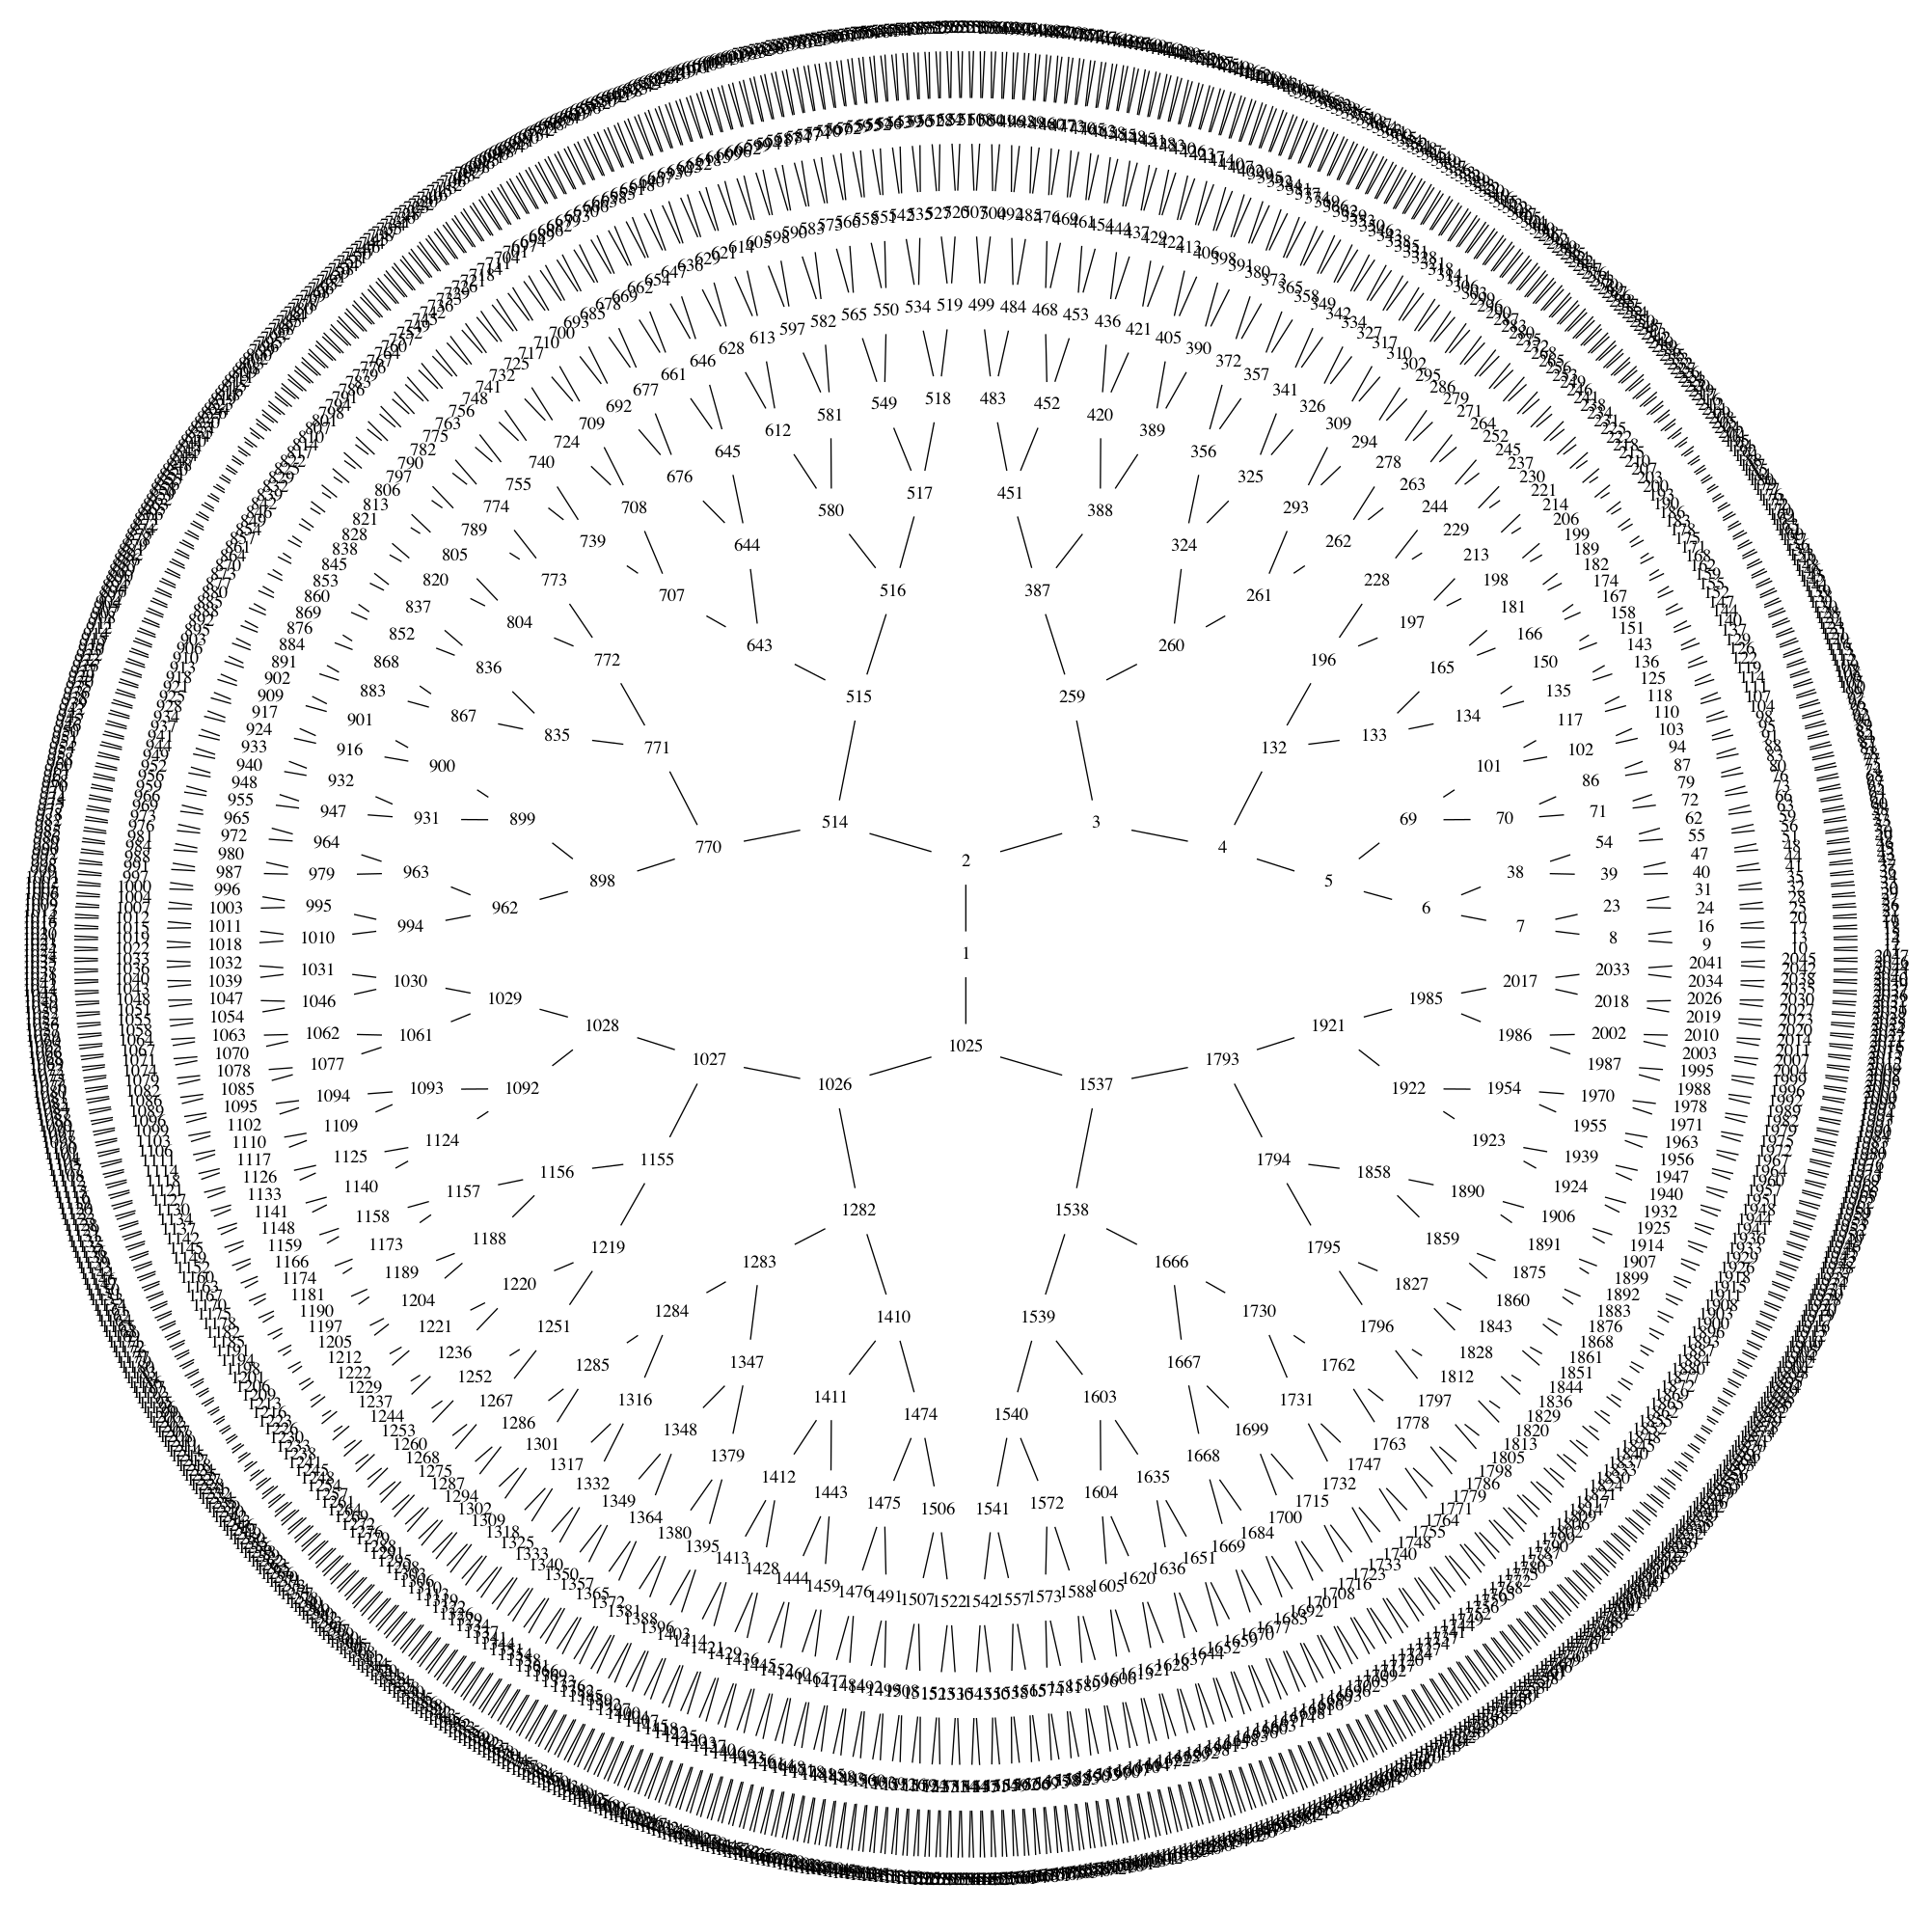

In [13]:
g.engine = 'twopi'
Image(g.pipe("png"))

## Une solution itérative ?

Voici une proposition de solution itérative :

1. Déplacer le plus petit disque (de 0 vers 1 ou 1 vers 2 ou 2 vers 0)
2. Déplacer l'autre disque (pas le choix !)
3. Recommencer jusqu'à ce que le but soit atteint

*Attention :* ne fonctionne que si $n$ est pair, inverser le sens de déplacement du petit disque sinon

In [14]:
def hanoi_iter(n):
    # départ et but
    tours = [0] * n
    but = [2] * n
    print(tours)
    
    # sens de rotation du plus petit disque 
    d = 1 if n % 2 == 0 else -1
    
    # répéter jusqu'à but atteint
    while tours[:n] != but:
        # on déplace le plus petit disque
        s = tours[0]
        t = (s + d) % 3 
        tours[0] = t
        print("{} (disque 0 de {} vers {})".format(tours, s, t))
        
        # on cherche l'autre disque à déplacer'
        for i in range(1, n):
            if tours[i] != tours[0]:
                s = tours[i]
                t = 3 - s - tours[0]
                tours[i] = t
                print("{} (disque {} de {} vers {})".format(tours, i, s, t))
                break
    print(tours)
        
hanoi_iter(3)

[0, 0, 0]
[2, 0, 0] (disque 0 de 0 vers 2)
[2, 1, 0] (disque 1 de 0 vers 1)
[1, 1, 0] (disque 0 de 2 vers 1)
[1, 1, 2] (disque 2 de 0 vers 2)
[0, 1, 2] (disque 0 de 1 vers 0)
[0, 2, 2] (disque 1 de 1 vers 2)
[2, 2, 2] (disque 0 de 0 vers 2)
[2, 2, 2]


**Question :** pourquoi ça fonctionne ?

## Autres variantes

- Disques en désordre au départ
    - Écrire un algorithme
    - Combien de déplacements ?

In [ ]:
def hanoi2(tours, n, source=0, dest=2):
    ...
    
# position aléatoire des disques
from random import choice
n = 3
tours = [choice((0, 1, 2)) for _ in range(n)]
print(tours)

- Déplacements directs de 0 vers 2 interdits
    - Écrire un algorithme
    - Combien de déplacements ?

In [ ]:
def hanoi3(tours, n, source=0, dest=2):
    ...
    
n = 3
tours = [0] * n
hanoi3(tours, n)
print(tours)

# Problème du sac à dos (simplifié)

- On considère un ensemble d'objets de poids connus.  
- Existe-t-il une manière de choisir les objets afin de remplir un sac à dos en atteignant précisément un certain poids $S$ ?

*Plus formellement :*

Étant donné un ensemble fini
$E \subset \mathbb{N}$ d'entiers positifs et un entier $S \geq 0$, existe-t-il un sous-ensemble $F$ de $E$ dont la somme vaut $S$ ?

## Algorithme

- Si $S = 0$, la solution est $\emptyset$
- Si $S < 0$, pas de solution
- Si $S > 0$ et $E = \emptyset$, pas de solution
- Sinon, soit $n \in E$ quelconque,

  - (On inclut l'élément $n$.) Chercher un sous-ensemble $F$ de $E \setminus \{n\}$ de
    somme $S - n$, et s'il existe répondre $F \cup \{n\}$
  - (On n'inclut pas $n$.) Sinon chercher un sous-ensemble $F$ de $E \setminus \{n\}$
    de somme $S$, et s'il existe répondre $F$

**Exercice :** modéliser et résoudre le problème en Python

In [ ]:
objets = [2, 9, 10, 7]
S = 19

## Arbre d'appels

<img src="img/appels_sac.png" width=70%></img>

**Exercice :** exécuter l'algorithme pour

```python
objets = [4, 11, 1, 7]
cible = 11
```

## Implémentation en Python

In [ ]:
def sac_a_dos_vrai_faux(ens, somme):
    if (somme == 0):
        return True
    if (somme < 0):
        return False
    if len(ens) == 0:  # on sait que somme > 0
        return False
    # je sais que : somme > 0 et len(ens) > 0
    res = sac_a_dos_vrai_faux(ens[1:], somme - ens[0])
    if res:
        return True
    else:
        return sac_a_dos_vrai_faux(ens[1:], somme)
    
sac_a_dos_vrai_faux([2, 9, 10, 7], 19)

In [ ]:
def sac_a_dos(ens, somme):
    if (somme == 0):
        return []
    if (somme < 0):
        return None
    if len(ens) == 0:
        return None
    res = sac_a_dos(ens[1:], somme - ens[0])
    if res is not None:
        res.append(ens[0])
        return res
    else:
        return sac_a_dos(ens[1:], somme)
    
sac_a_dos([2, 9, 10, 7], 19)

In [ ]:
from callstats import CallRecorder
from IPython import display

In [ ]:
sac_a_dos = CallRecorder(sac_a_dos)

In [ ]:
g = sac_a_dos([2, 9, 10, 7], 19).graph()
g

In [ ]:
g = sac_a_dos([4, 11, 1, 7], 11).graph()
g

In [ ]:
g = sac_a_dos([1, 1, 0, 14, 100, 21, 40, 5, 3, 12], 20).graph()
display.Image(g.pipe('png'))

**Exercice :** écrire une fonction semblable qui renvoie la liste de *toutes* les solutions de l'instance donnée.

**Exercice :** un problème du sac à dos plus général associe à chaque objet une valeur entière $v$. Le but est de maximiser la valeur totale des objets choisis tout en conservant un poids inférieur ou égal à $S$. Proposer un algorithme pour résoudre ce problème.

**Exercice :** comme dans le TP sur les suites de Syracuse et de Fibonacci, écrire une version *mémoisée* de la fonction `sac_a_dos`, c'est à dire une version qui utilise un dictionnaire pour stocker la solution déjà trouvée pour une liste de poids et une somme à atteindre données (ou la meilleure solution, ou toutes les solutions).